In [1]:
import docx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def extract_text(name_file):
    doc = docx.Document(name_file)
    line = []
    for full_text in doc.paragraphs:
        tmp = full_text.text.split(",")
        line.append(tmp)
    line = line[2 : len(line) - 1]
    return line
dataset = extract_text("dataset_exam.docx")
for i in range(len(dataset)) :
    for j in range(len(dataset[0])) :
        dataset[i][j] = float(dataset[i][j])
dataset = np.array(dataset)

In [3]:
X = dataset[ : , : -1]
X0 = np.ones((X.shape[0], 1))
X = np.hstack((X0, X))
col_mean = np.mean(X, axis=0)
col_std = np.std(X, axis=0)
for i in range(1, X.shape[1]) :
    for j in range(X.shape[0]) :
        X[j][i] = X[j][i] - col_mean[i]
        X[j][i] = X[j][i] / col_std[i]
y = dataset[ : , -1]

In [4]:
size_train = int((X.shape[0] * 3) / 4)
train_X_indices = random.sample(range(0, 100), size_train)
train_X, test_X, train_y, test_y = [], [], [], []
for i in range(X.shape[0]) :
    if(i in train_X_indices) :
        train_X.append(X[i])
        train_y.append(y[i])
    else :
        test_X.append(X[i])
        test_y.append(y[i])
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

In [5]:
count_iterations = 0
alpha = 0.01
reg_lambda = 0.03
delta = 0.0000001
m = float(train_X.shape[0])
count_feature = (train_X.shape[1])
theta = np.random.uniform(-1, 1, count_feature)

In [6]:
def reg_cost_function(X, y) :
    reg_val1 = np.dot(np.transpose(y), np.log(sig(input_net(X))))
    reg_val2 = np.dot(np.transpose(1.0 - y), np.log(1.0 - sig(input_net(X))))
    reg_val3 = (reg_lambda / (2.0 * m)) * (sum(np.square(theta[1:])))
    return (-1.0 / m) * (reg_val1 + reg_val2) + reg_val3
def input_net(X) :
    return np.dot(X, theta)
def sig(x) :
    return 1.0 / (1.0 + np.exp(-x))
def calc_gradient(X, y) :
    reg_val1 = (1 / m) * np.dot(np.transpose(X), (sig(input_net(X)) - y))
    reg_val2 = np.zeros(theta.shape)
    reg_val2[1 : ] = (reg_lambda / m) * theta[1 : ]
    return reg_val1 + reg_val2
def reg_gradient_descent(X, y) :
    vals_cost = []
    list_ite = []
    error_prev = -1
    cost_prev = -1
    global theta
    global count_iterations
    while True :
        count_iterations = count_iterations + 1
        list_ite.append(count_iterations)
        theta = theta - alpha * calc_gradient(X, y)
        cost_new = reg_cost_function(X, y)
        vals_cost.append(cost_new)
        if(cost_prev == -1) :
            cost_prev = cost_new
        else :
            error_prev = cost_prev - cost_new
            cost_prev = cost_new
            if(error_prev <= delta) :
                break
    print(count_iterations)
    plt.plot(list_ite, vals_cost)

26621
Error :  0.20167054314694022
Theta values:  [1.9054809  3.67120795 3.73248149]


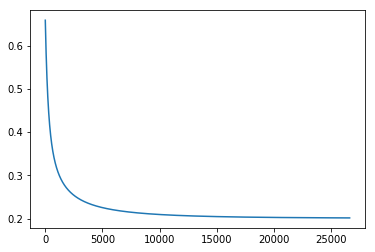

In [7]:
reg_gradient_descent(train_X, train_y)
print('Error : ', reg_cost_function(train_X, train_y))
print('Theta values: ', theta)

In [8]:
admitted_x_vals = []
n_admitted_x_vals = []
admitted_y_vals = []
n_y_admitted_vals = []
for i in range(int(m)) :
    if(train_y[i] == 1.0) :
        admitted_x_vals.append(train_X[i][1])
        admitted_y_vals.append(train_X[i][2])
    else :
        n_admitted_x_vals.append(train_X[i][1])
        n_y_admitted_vals.append(train_X[i][2])

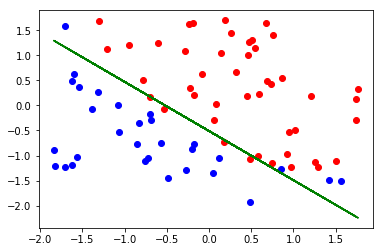

In [9]:
x_decision_vals = train_X[: , 1]
y_decision_vals = -1.0 * ((theta[0] + theta[1] * x_decision_vals) / (theta[2]))
plt.plot(admitted_x_vals, admitted_y_vals, 'ro')
plt.plot(n_admitted_x_vals, n_y_admitted_vals, 'bo')
plt.plot(x_decision_vals, y_decision_vals, 'g')

In [10]:
correct_total = 0
evaluated_train_data_vals = sig(input_net(train_X))
for i in range(len(train_X)) :
    if(train_y[i] == 1 and evaluated_train_data_vals[i] > 0.5) :
        correct_total = correct_total + 1
    elif(train_y[i] == 0 and evaluated_train_data_vals[i] < 0.5) :
        correct_total = correct_total + 1
print('Accuracy on train data :', (correct_total / train_X.shape[0]) * 100)

Accuracy on train data : 89.33333333333333


In [11]:
correct_total = 0
evaluated_test_data_vals = sig(input_net(test_X))
for i in range(len(test_X)) :
    if(test_y[i] == 1 and evaluated_test_data_vals[i] >= 0.5) :
        correct_total = correct_total + 1
    elif(test_y[i] == 0 and evaluated_test_data_vals[i] < 0.5) :
        correct_total = correct_total + 1
print('Accuracy on test data :', (correct_total / test_X.shape[0]) * 100)

Accuracy on test data : 92.0
